Shape of y_pred_train: (3456,)
Shape of y_train: (3456,)
Train RMSE: 17.855749458602336
Test RMSE: 16.125035404004404


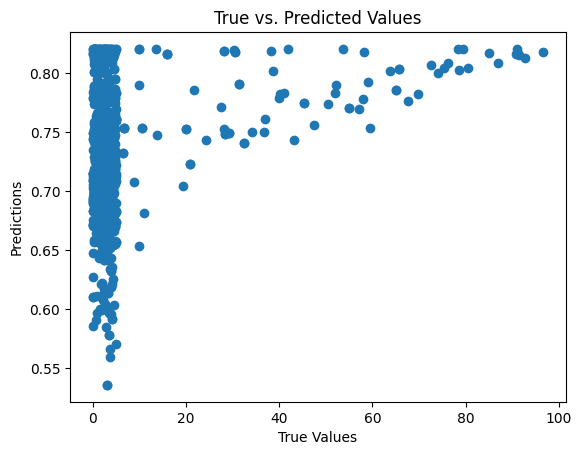

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Define Gaussian membership function
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Define ANFIS class
class ANFIS:
    def __init__(self, n_inputs, n_rules):
        self.n_inputs = n_inputs
        self.n_rules = n_rules
        self.rules = np.random.rand(n_rules, n_inputs + 1)

    # def forward_pass(self, X):
    #     # Calculate rule activations
    #     rule_outputs = np.prod(np.array([gaussmf(X[:, i][:, None], self.rules[:, i], self.rules[:, self.n_inputs]) for i in range(self.n_inputs)]), axis=0)
    #     # Normalize rule activations
    #     rule_outputs_sum = np.sum(rule_outputs, axis=1)
    #     normalized_rule_outputs = rule_outputs / rule_outputs_sum[:, None]

    #     # Expand dimensions of X for element-wise multiplication
    #     X_expanded = np.expand_dims(X, axis=1)

    #     # Repeat normalized_rule_outputs to match the shape of X_expanded
    #     normalized_rule_outputs_expanded = np.repeat(normalized_rule_outputs[:, :, np.newaxis], X_expanded.shape[2], axis=2)

    #     # Calculate overall outputs using element-wise multiplication and summation
    #     y_pred = np.sum(normalized_rule_outputs_expanded * X_expanded, axis=1)

    #     return y_pred
    def forward_pass(self, X):
      # Calculate rule activations
      rule_outputs = np.prod(np.array([gaussmf(X[:, i][:, None], self.rules[:, i], self.rules[:, self.n_inputs]) for i in range(self.n_inputs)]), axis=0)
      # Normalize rule activations
      rule_outputs_sum = np.sum(rule_outputs, axis=1)
      normalized_rule_outputs = rule_outputs / rule_outputs_sum[:, None]

      # Calculate overall outputs using weighted sum
      y_pred = np.dot(normalized_rule_outputs, self.rules[:, -1])

      return y_pred




# Load the generated data
df = pd.read_excel('agriculture_data_for_ann.xlsx')

# Select features and target variable
X = df[['Moisture(%)', 'Temperature(C)', 'Humidity(%)', 'Rain(cm)', 'Water Level(mm)']].values
y = df['Irrigation amount needed(l)'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize ANFIS model
anfis_model = ANFIS(n_inputs=X_train.shape[1], n_rules=10)

# Train ANFIS model (forward pass only)
y_pred_train = anfis_model.forward_pass(X_train).flatten()
y_pred_test = anfis_model.forward_pass(X_test).flatten()

print("Shape of y_pred_train:", y_pred_train.shape)
print("Shape of y_train:", y_train.shape)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plotting
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values")
plt.show()


In [2]:
def predict_irrigation_amount(anfis_model, scaler):
    print("Enter current conditions for prediction (Moisture(%), Temperature(C), Humidity(%), Rain(cm), Water Level(mm)):")
    user_input = np.array([float(x) for x in input().split()])
    if len(user_input) != 5:
        print("Invalid input. Please provide all 5 values.")
        return

    # Standardize user input using the same scaler used for training
    user_input_scaled = scaler.transform(user_input.reshape(1, -1))

    # Predict irrigation amount using the ANFIS model
    irrigation_amount = anfis_model.forward_pass(user_input_scaled).flatten()[0]

    print(f"Predicted irrigation amount needed: {irrigation_amount:.2f} liters")

# Usage
predict_irrigation_amount(anfis_model, scaler)


Enter current conditions for prediction (Moisture(%), Temperature(C), Humidity(%), Rain(cm), Water Level(mm)):
45 26 60 35 560
Predicted irrigation amount needed: 0.76 liters


In [4]:
def predict_and_compare_irrigation(anfis_model, scaler, previous_irrigation):
    print("Enter current conditions for prediction (Moisture(%), Temperature(C), Humidity(%), Rain(cm), Water Level(mm)):")
    user_input = np.array([float(x) for x in input().split()])
    if len(user_input) != 5:
        print("Invalid input. Please provide all 5 values.")
        return

    # Standardize user input using the same scaler used for training
    user_input_scaled = scaler.transform(user_input.reshape(1, -1))

    # Predict irrigation amount using the ANFIS model
    irrigation_amount = anfis_model.forward_pass(user_input_scaled).flatten()[0]

    print(f"Predicted irrigation amount needed: {irrigation_amount:.2f} liters")

    # Compare with previous irrigation amount
    if irrigation_amount > previous_irrigation:
        print("The predicted irrigation amount is higher than the previous requirement.")
    elif irrigation_amount < previous_irrigation:
        print("The predicted irrigation amount is lower than the previous requirement.")
    else:
        print("The predicted irrigation amount is the same as the previous requirement.")

# Usage
previous_irrigation = 100  # Example: previous irrigation amount (in liters)
predict_and_compare_irrigation(anfis_model, scaler, previous_irrigation)


Enter current conditions for prediction (Moisture(%), Temperature(C), Humidity(%), Rain(cm), Water Level(mm)):
45 27 66 56 98
Predicted irrigation amount needed: 0.93 liters
The predicted irrigation amount is lower than the previous requirement.
